In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# Read Data

In [2]:
path_to_processed_df = "../data/processed/P01"

#Get list of csv files
data_paths = os.listdir(path_to_processed_df)

# Keep only csv data
data_paths = [x for x in data_paths if x.endswith(".csv")]
data_paths = [os.path.join(path_to_processed_df, x) for x in data_paths]
data_paths.sort()

In [3]:
def load_data_as_dataframe(data_paths: list[str]) -> list[pd.DataFrame]:
    """ Loads the .csv file into dataframes

    :return: list[pd.DataFrames]
    """
    data = []
    for path in data_paths:
        df = pd.read_csv(path)
        # Convert 'TS_UNIX' to datetime
        df = df.set_index("TS_UNIX", drop=True)
        data.append(df)

    return data

df_list = load_data_as_dataframe(data_paths)

# Processing

In [4]:
FEATURE_NAMES = list(df_list[0].columns)
df_list[0]

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
TS_UNIX,,,,,,,
2022-06-20 16:52:00.482892032+02:00,2.627422,1.855009,4.020922,1.478189,4.339555,1.561284,3.142269
2022-06-20 16:52:00.482905088+02:00,2.444575,1.693927,3.758652,1.222329,3.966451,1.328616,2.830244
2022-06-20 16:52:00.482917888+02:00,2.270200,1.542644,3.514562,1.027031,3.598714,1.113825,2.546634
2022-06-20 16:52:00.482929920+02:00,2.121425,1.408440,3.302235,0.889588,3.246621,0.916807,2.312470
2022-06-20 16:52:00.482949888+02:00,2.007978,1.297264,3.125684,0.797827,2.916363,0.738571,2.134958
...,...,...,...,...,...,...,...
2022-06-20 16:53:27.914141952+02:00,0.532971,0.538213,0.037965,0.951213,-0.198071,0.973324,-0.842514
2022-06-20 16:53:27.914152960+02:00,0.548611,0.574675,0.023627,0.939592,-0.234455,0.972067,-0.744485
2022-06-20 16:53:27.914163968+02:00,0.564981,0.606522,-0.000629,0.910126,-0.286229,0.969688,-0.639527


In [5]:
df_scaled_list = []

for df in df_list:
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
    df_scaled_list.append(df_scaled)

In [6]:
df_scaled_list[0].describe()

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
count,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000
mean,0.498897,0.568642,0.538752,0.560380,0.521214,0.575447,0.575367
std,0.074067,0.105546,0.104231,0.108272,0.112641,0.109296,0.107549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.483348,0.546228,0.501817,0.527163,0.484041,0.547491,0.535497
50%,0.501737,0.576657,0.540619,0.567326,0.522486,0.582995,0.583697
75%,0.523226,0.605433,0.576856,0.607301,0.567517,0.616185,0.625451
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Reshape to LSTM format

In [7]:
# Validation Set
df_scaled_list_val = df_scaled_list[:2]
df_scaled_list = df_scaled_list[len(df_scaled_list_val):]

In [8]:
def stack_to_3d(df_list: list[pd.DataFrame]) -> np.array:

    sequence_length = df_list[0].shape[0]

    # Convert DataFrames to numpy arrays and reshape them
    reshaped_data = []
    for df in df_list:
        # Convert DataFrame to numpy array
        data_array = df.values  # Assuming your DataFrame is named 'df'

        # Calculate the number of sequences that can be extracted
        num_sequences = len(data_array) - sequence_length + 1

        # Extract sequences of length 'sequence_length'
        for i in range(num_sequences):
            sequence = data_array[i:i + sequence_length]
            reshaped_data.append(sequence)

    # Convert reshaped_data to a numpy array
    reshaped_data = np.array(reshaped_data)
    return reshaped_data

reshaped_data = stack_to_3d(df_scaled_list)
reshaped_data_val = stack_to_3d(df_scaled_list_val)

# Check the shape of the reshaped data
print(reshaped_data.shape)
print(reshaped_data_val.shape)

(8, 10990, 7)
(2, 10990, 7)


# Modelling

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dense, Bidirectional, TimeDistributed, Reshape

# Sampling layer
@tf.keras.saving.register_keras_serializable()
class Sampling(tf.keras.layers.Layer):
    def call(self, args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [10]:
# Hyperparams
sequence_length = df_scaled_list[0].shape[0]
latent_dims = 2
num_features = df_scaled_list[0].shape[1]


# Encoder Architecture
inputs = Input(shape=(sequence_length, num_features))
z = LSTM(128)(inputs)
z_mean = Dense(latent_dims, activation="tanh")(z)
z_log_var = Dense(latent_dims, activation="tanh")(z)
codings = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(inputs=[inputs], outputs = [z_mean, z_log_var, codings], name="encoder")

# Decoder Architecture
decoder_inputs = Input(shape=(latent_dims,))
x = Dense(1024)(decoder_inputs)
x = Dense(sequence_length * 1, name='Decode_1')(x)
x = Reshape((sequence_length, 1), name='Decode_2')(x)
x = LSTM(num_features, activation='tanh', return_sequences=True)(x)
x = TimeDistributed(Dense(num_features, activation='linear'), name='Decoder_Output_Layer')(x)
decoder = tf.keras.Model(inputs=decoder_inputs, outputs=x, name="decoder")

# Connecting Encoder + Decoder
_, _, codings = encoder(inputs)
reconstructions = decoder(codings)
vae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

# Latent Loss
latent_loss = -0.5 * tf.keras.backend.sum(
                1 + z_mean - tf.keras.backend.exp(z_log_var) - tf.keras.backend.square(z_mean),
            axis=-1)
vae.add_loss(tf.keras.backend.mean(latent_loss) / sequence_length)

# Compile VAE
vae.compile(loss="mse", optimizer="adam")

In [11]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10990, 7)]           0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 128)                  69632     ['input_1[0][0]']             
                                                                                                  
 dense (Dense)               (None, 2)                    258       ['lstm[0][0]']                
                                                                                                  
 dense_1 (Dense)             (None, 2)                    258       ['lstm[0][0]']                
                                                                                            

In [12]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              3072      
                                                                 
 Decode_1 (Dense)            (None, 10990)             11264750  
                                                                 
 Decode_2 (Reshape)          (None, 10990, 1)          0         
                                                                 
 lstm_1 (LSTM)               (None, 10990, 7)          252       
                                                                 
 Decoder_Output_Layer (Time  (None, 10990, 7)          56        
 Distributed)                                                    
                                                           

In [13]:
# If this is outcommented, use the tf.keras.load_model() function below
#history = vae.fit(reshaped_data, reshaped_data, epochs=32, batch_size=1, validation_data=(reshaped_data_val, reshaped_data_val))

In [14]:
def plot_history(history):
    loss_dict = history.history

    loss_train = loss_dict["loss"]
    loss_val = loss_dict["val_loss"]
    x = [i+1 for i in range(0, len(loss_val))]

    plt.figure(figsize=(7, 4))
    plt.title("$L_2$ Loss")
    sns.lineplot(x=x, y=loss_train, label="Train")
    sns.lineplot(x=x, y=loss_val, label="Val")

#plot_history(history)

## Save or load existing model

In [15]:
# Save model
#vae.save("../models/e32-b1_final_dir_2")

In [16]:
# Load Model
vae = tf.keras.models.load_model("../models/e32-b1_final_dir")#, custom_objects={'CustomLayer': Sampling})

# Synthesize

In [36]:
val_sample = np.expand_dims(reshaped_data_val[0], axis=0)
train_sample = np.expand_dims(reshaped_data[0], axis=0)
print(val_sample.shape)
print(train_sample.shape)

(1, 10990, 7)
(1, 10990, 7)


In [37]:
val_sample_reconstructed = vae.predict(val_sample)
train_sample_reconstructed = vae.predict(train_sample)

1/1 [==============================] - 1s 843ms/step


In [38]:
val_sample_reconstructed[0]

array([[0.37020972, 0.21541268, 0.42493543, ..., 0.28979555, 0.46836364,
        0.34134606],
       [0.46657762, 0.28947154, 0.48378682, ..., 0.40978247, 0.5380251 ,
        0.47671807],
       [0.49010667, 0.34128112, 0.49572745, ..., 0.4666288 , 0.5410144 ,
        0.5171333 ],
       ...,
       [0.50688714, 0.47359905, 0.49160188, ..., 0.5166807 , 0.49777818,
        0.5247072 ],
       [0.51113266, 0.4745265 , 0.49408203, ..., 0.51998186, 0.4997819 ,
        0.5300431 ],
       [0.5130184 , 0.4757691 , 0.4955972 , ..., 0.5226538 , 0.50071365,
        0.5328798 ]], dtype=float32)

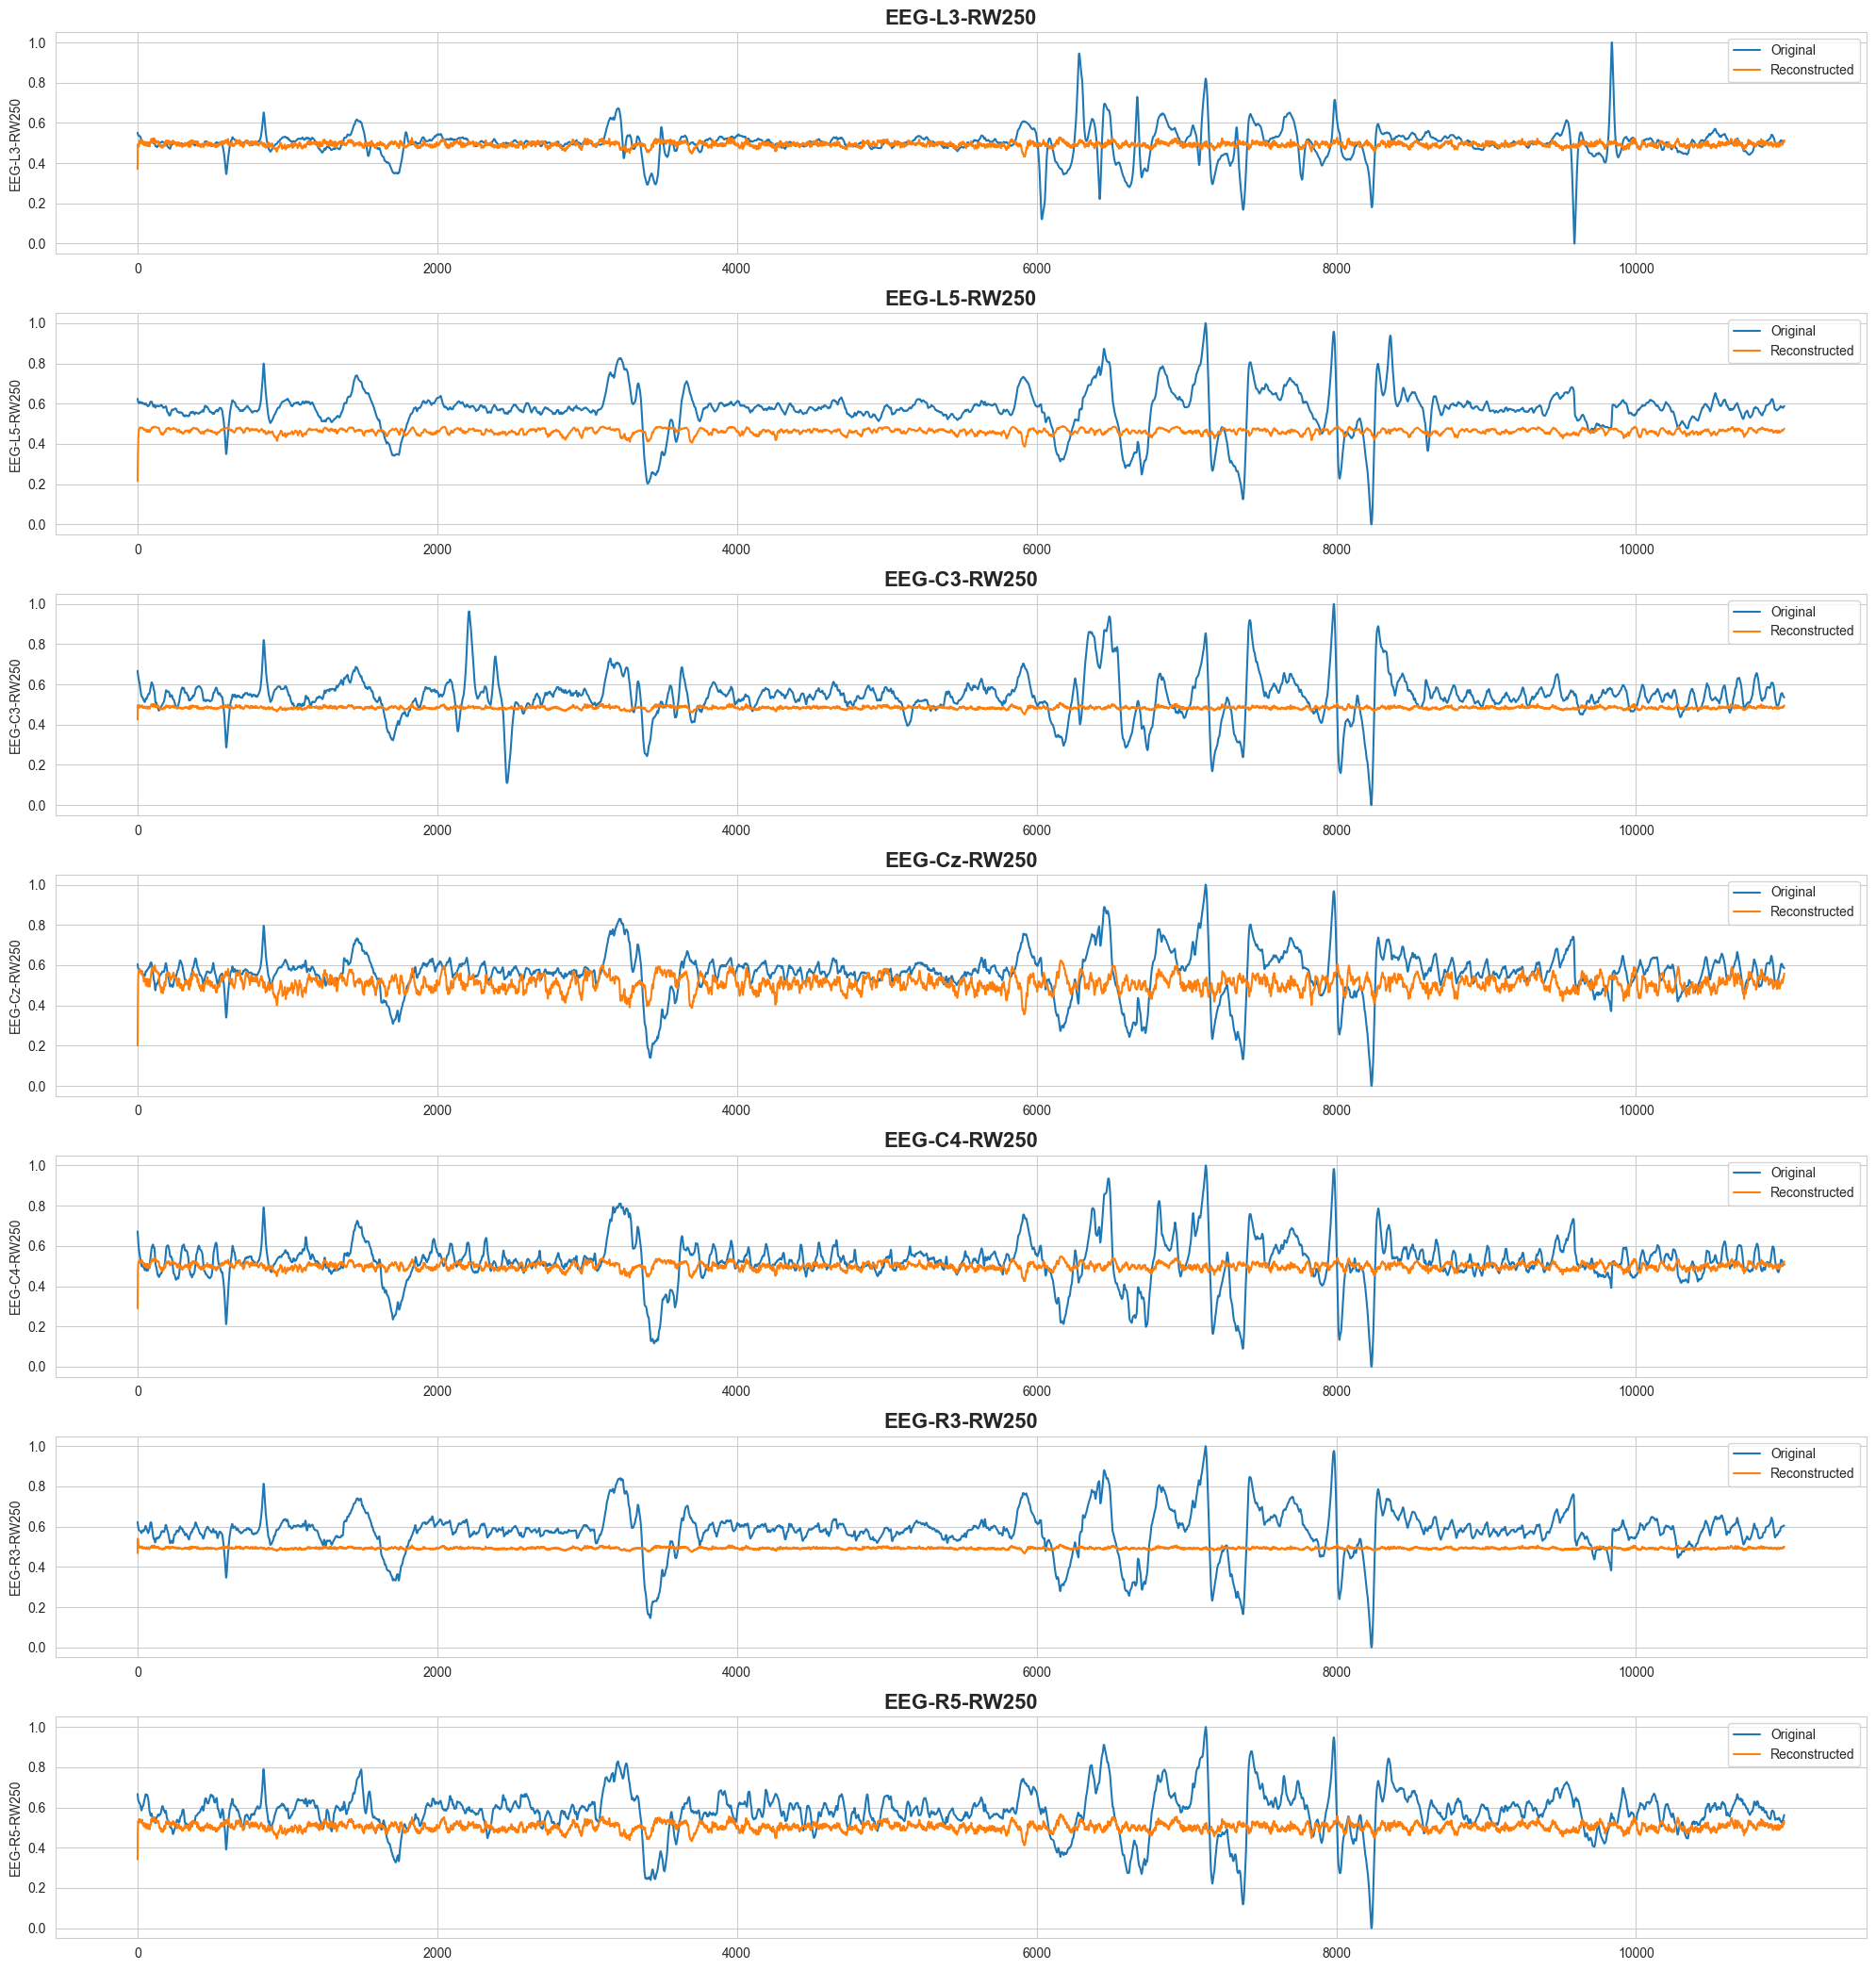

In [39]:
# Compare original and reconstruction
def compare_original_and_reconstruction(sample: np.array, sample_reconstructed: np.array) -> None:
    df_sample = pd.DataFrame(sample, columns=FEATURE_NAMES)
    df_reconstructed = pd.DataFrame(sample_reconstructed, columns=FEATURE_NAMES)

    fig, axes = plt.subplots(nrows=len(FEATURE_NAMES), ncols=1, figsize=(20, len(FEATURE_NAMES)*3))
    for col, ax in zip(FEATURE_NAMES, axes.flatten()):
        sns.lineplot(data=df_sample, x=df_sample.index, y=col, ax=ax, label="Original")
        sns.lineplot(data=df_reconstructed, x=df_reconstructed.index, y=col, ax=ax, label="Reconstructed")
        ax.set_title(col, fontweight="bold", size=16)
    fig.tight_layout()


compare_original_and_reconstruction(val_sample[0], val_sample_reconstructed[0])

## Or generate complete new ones by sampling from latent space ...

In [40]:
# Generate synthetic data function using the decoder part of the VAE
def generate_time_series(num_samples, latent_dims):
    # Sample from the latent space
    latent_samples = np.random.normal(size=(num_samples, latent_dims))
    print(f"Latent Samples: {latent_samples}")
    # Generate synthetic data using the decoder model
    synthetic_data = decoder(latent_samples).numpy()
    return synthetic_data

# Generate synthetic time series data
num_samples = 1
synthetic_time_series = generate_time_series(num_samples, latent_dims)
print(synthetic_time_series.shape)

Latent Samples: [[ 0.6497725  -1.15324122]]
(1, 10990, 7)


In [41]:
test = synthetic_time_series[0]
test.shape

(10990, 7)

In [42]:
test_df = pd.DataFrame(test, columns=df_scaled_list[0].columns)#, index=df_scaled_list[0].index)
test_df

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
0,0.003588,0.001569,-0.001880,-0.002860,0.001406,-0.001675,0.003586
1,0.002835,0.000845,-0.001736,-0.002472,0.001145,-0.001381,0.002774
2,0.002352,0.000438,-0.001612,-0.002191,0.000965,-0.001176,0.002256
3,0.001340,-0.000082,-0.001141,-0.001426,0.000562,-0.000708,0.001224
4,0.003616,0.000968,-0.002306,-0.003213,0.001439,-0.001752,0.003503
...,...,...,...,...,...,...,...
10985,0.000379,0.000009,-0.000364,-0.000399,0.000116,-0.000215,0.000346
10986,0.002506,0.000957,-0.001458,-0.002089,0.000955,-0.001200,0.002484
10987,-0.000181,-0.000450,-0.000196,-0.000061,-0.000074,0.000011,-0.000245
10988,0.001782,0.000556,-0.001128,-0.001554,0.000681,-0.000871,0.001744


## Visualize Synthetic Samples

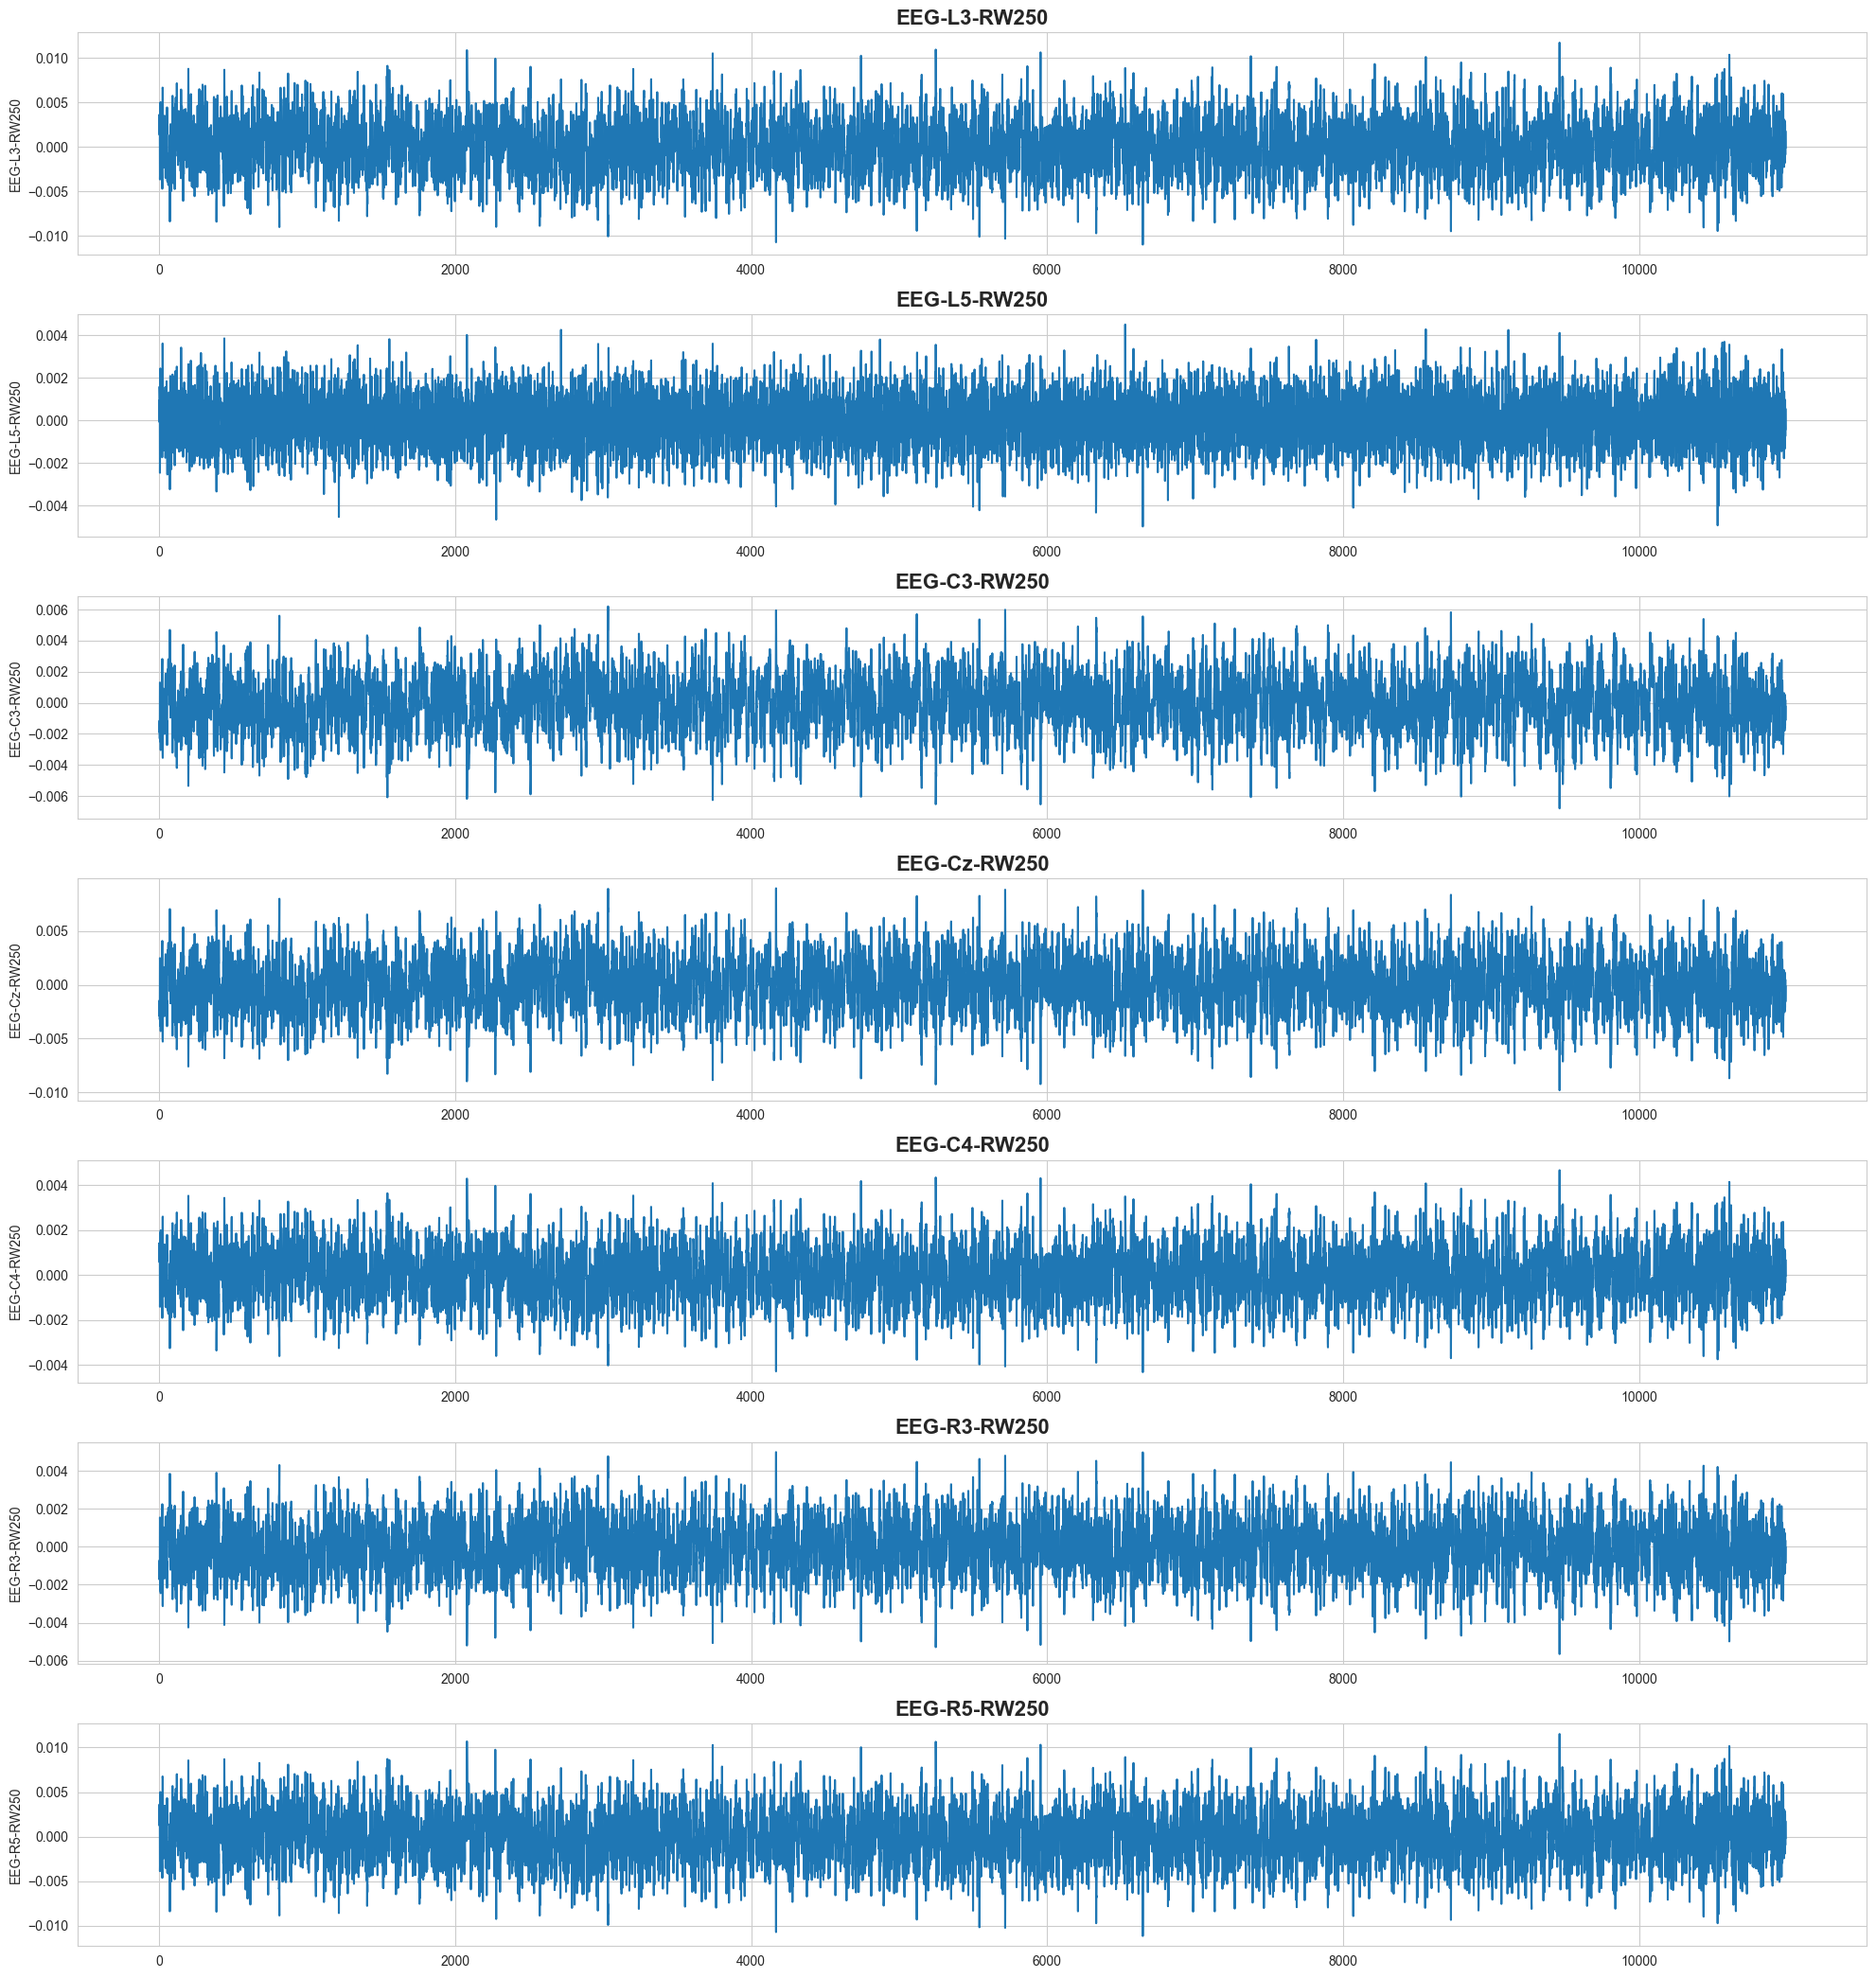

In [43]:
def plot_all_time_series(df: pd.DataFrame) -> None:
    """ Plots all Time Series (all float64 columns) in the provided DataFrame

    :param df: pd.DataFrame -- Input DataFrame
    :param time_col: str -- Name of the time column
    :return: None
    """
    cols = [x for x in list(df.columns) if x.endswith(f"RW{250}")]

    fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(20, len(cols)*3))
    for col, ax in zip(cols, axes.flatten()):
        sns.lineplot(data=df, x=df.index, y=col, ax=ax)
        ax.set_title(col, fontweight="bold", size=16)
    fig.tight_layout()

plot_all_time_series(test_df)

____________
# Visualize Test and Reconstruction Sample using TSNE

In [44]:
# TBD